In [1]:
import warnings
warnings.simplefilter(action="ignore")

In [2]:
# import pandas as pd
# import numpy as np
# from datetime import timedelta
# from datetime import datetime
# import matplotlib.pyplot as plt
# from scipy.stats import norm
# import seaborn as sns
# CHuẩn hoá dữ liệu
# from sklearn.preprocessing import MinMaxScaler

In [2]:
from data_load import load_data
from data_visualization import (
    visualize_volume_avg_hour,
    visualize_vpin_and_gap_time,
    visualize_price
)
from data_processing import (
    transform_avg_volume_hourly,
    transform_buy_sell_volume,
    # calculate_V,
    # calculate_bucket_number,
    # calculate_vpin,
    calcualate_gap_time_faction_of_the_day,
    # transform_price_data
)

In [3]:
# Load data
data_tick = load_data()
data_orderbook = load_data(folder="orderbook")
data_vn30_index = load_data(folder="")

In [4]:
data_orderbook["VCB"]

,Date,Ma CK,Ban Gia 1,Ban Gia 2,Ban Gia 3,Ban KL 1,Ban KL 2,Ban KL 3,Mua Gia 1,Mua Gia 2,Mua Gia 3,Mua KL 1,Mua KL 2,Mua KL 3
0,2024-09-23 13:00:11.536088,VCB,91.4,91.5,91.6,3430.0,8500.0,6550.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-09-23 13:01:53.348381,VCB,91.4,91.5,91.6,3250.0,8630.0,6570.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-09-23 13:01:53.777853,VCB,91.4,91.5,91.6,3250.0,8650.0,6570.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-09-23 13:02:07.310681,VCB,91.4,91.5,91.6,3300.0,8650.0,6570.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-09-23 13:02:10.832277,VCB,91.4,91.5,91.6,3280.0,8650.0,6560.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44652,2024-11-15 14:20:00.758566,VCB,NaN,NaN,NaN,NaN,NaN,NaN,92.2,92.1,92.0,2810.0,5280.0,5100.0
44653,2024-11-15 14:21:01.161849,VCB,NaN,NaN,NaN,NaN,NaN,NaN,92.2,92.1,92.0,2820.0,5280.0,5100.0
44654,2024-11-15 14:22:10.841784,VCB,NaN,NaN,NaN,NaN,NaN,NaN,92.2,92.1,92.0,2370.0,5280.0,5100.0
44655,2024-11-15 14:22:12.820366,VCB,NaN,NaN,NaN,NaN,NaN,NaN,92.2,92.1,92.0,2200.0,5280.0,5100.0


In [5]:
data_tick["VCB"]

,Date,Ma CK,Gia KL,KL
0,2024-09-23 13:00:07.515870,VCB,91.3,90
1,2024-09-23 13:00:07.523086,VCB,91.3,10
2,2024-09-23 13:00:07.547532,VCB,91.3,20
3,2024-09-23 13:00:07.553539,VCB,91.3,10
4,2024-09-23 13:00:07.562690,VCB,91.3,20
...,...,...,...,...
21257,2024-11-15 14:23:11.318337,VCB,92.1,20
21258,2024-11-15 14:23:11.323727,VCB,92.1,40
21259,2024-11-15 14:23:11.689292,VCB,92.1,10
21260,2024-11-15 14:28:52.473797,VCB,92.2,20


## PHẦN 1: VOLUME THEO THỜI GIAN

In [8]:
key1 = "STB"
key2 = "SAB"
STB_avg_hourly, SAB_avg_hourly = transform_avg_volume_hourly(data_tick)
SAB_avg_hourly, STB_avg_hourly

(   Hour         KL
 0     9  58.772920
 1    10  54.110919
 2    11  42.729430
 3    13  55.199203
 4    14  54.119795,
    Hour          KL
 0     9  238.257788
 1    10  219.788697
 2    11  223.656007
 3    13  250.128809
 4    14  275.724979)

- Vì sàn chứng khoáng Việt Nam chỉ giao dịch từ:
    - 9h sáng 11h30 trưa
    - Nghỉ trưa từ 11h30 đến 13h chiều
    - Hoặt động lại từ 13h chiều đến 15h00 chiều
- Do đó dữ liệu theo giờ chỉ có ở các mốc 9, 10, 11, 13, 14 (làm tròn lùi theo giờ)

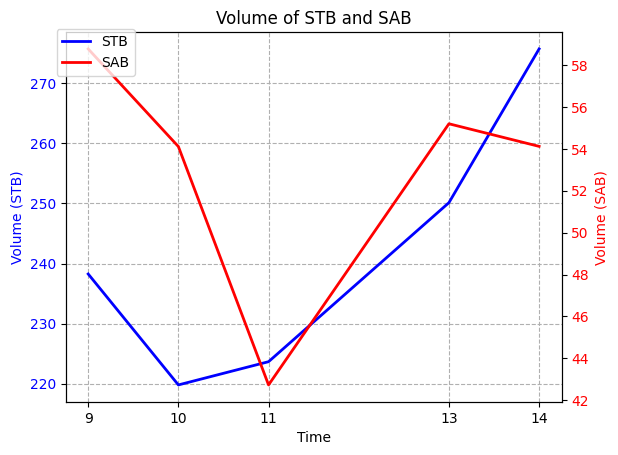

In [9]:
visualize_volume_avg_hour(STB_avg_hourly, SAB_avg_hourly)

## PHẦN 2: VPIN

In [7]:
# Chọn ra 1 loại cổ phiêú
key1 = "STB"
STB = transform_buy_sell_volume(data_orderbook, key1=key1)
STB.head()

,Date,Gia_Ban,Gia_Mua,KL_ban,KL_mua,KL
0,2024-09-23 13:00:05,31.0,30.85,119180.0,39880.0,159060.0
1,2024-09-23 13:00:07,0.0,30.85,0.0,39740.0,39740.0
2,2024-09-23 13:00:09,31.0,0.00,60260.0,0.0,60260.0
3,2024-09-23 13:00:10,31.0,0.00,60470.0,0.0,60470.0
4,2024-09-23 13:00:13,0.0,30.85,0.0,39650.0,39650.0


In [8]:
# # Tính V
V, STB = calculate_V(STB)
V

np.float64(10597695.6)

In [9]:
# # Chia bucket
bucket_df = calculate_bucket_number(STB, V)
bucket_df.head()

,index,Date,Gia_Ban,Gia_Mua,KL_ban,KL_mua,KL,Date_only,bucket_number
0,741,2024-09-24 09:30:11,30.95,0.0,38620.0,0.0,38620.0,2024-09-24,1
1,742,2024-09-24 09:30:20,30.95,0.0,38610.0,0.0,38610.0,2024-09-24,1
2,743,2024-09-24 09:30:25,0.00,30.8,0.0,23870.0,23870.0,2024-09-24,1
3,744,2024-09-24 09:30:27,0.00,30.8,0.0,23770.0,23770.0,2024-09-24,1
4,745,2024-09-24 09:30:31,0.00,30.8,0.0,23660.0,23660.0,2024-09-24,1


In [10]:
# Tính vpin
vpin_df = calculate_vpin(bucket_df, n=50, V=V)
vpin_df.head()

,start_bucket_time,end_bucket_time,vpin,gap_time,start_bucket,end_bucket
0,2024-09-24 09:30:11,2024-09-24 09:58:58,0.475575,1727.0,1,50
1,2024-09-24 09:58:58,2024-09-24 10:23:17,0.478128,1459.0,2,51
2,2024-09-24 10:23:17,2024-09-24 10:36:59,0.482846,822.0,3,52
3,2024-09-24 10:36:59,2024-09-24 10:46:12,0.488788,553.0,4,53
4,2024-09-24 10:46:12,2024-09-24 10:57:18,0.479989,666.0,5,54


In [11]:
# Tính Time gap faction of the day
vpin_df = calcualate_gap_time_faction_of_the_day(vpin_df)
vpin_df.head()

,start_bucket_time,end_bucket_time,vpin,gap_time,start_bucket,end_bucket,gap_time_faction_of_the_day
0,2024-09-24 09:30:11,2024-09-24 09:58:58,0.475575,1727.0,1,50,0.106605
1,2024-09-24 09:58:58,2024-09-24 10:23:17,0.478128,1459.0,2,51,0.090062
2,2024-09-24 10:23:17,2024-09-24 10:36:59,0.482846,822.0,3,52,0.050741
3,2024-09-24 10:36:59,2024-09-24 10:46:12,0.488788,553.0,4,53,0.034136
4,2024-09-24 10:46:12,2024-09-24 10:57:18,0.479989,666.0,5,54,0.041111


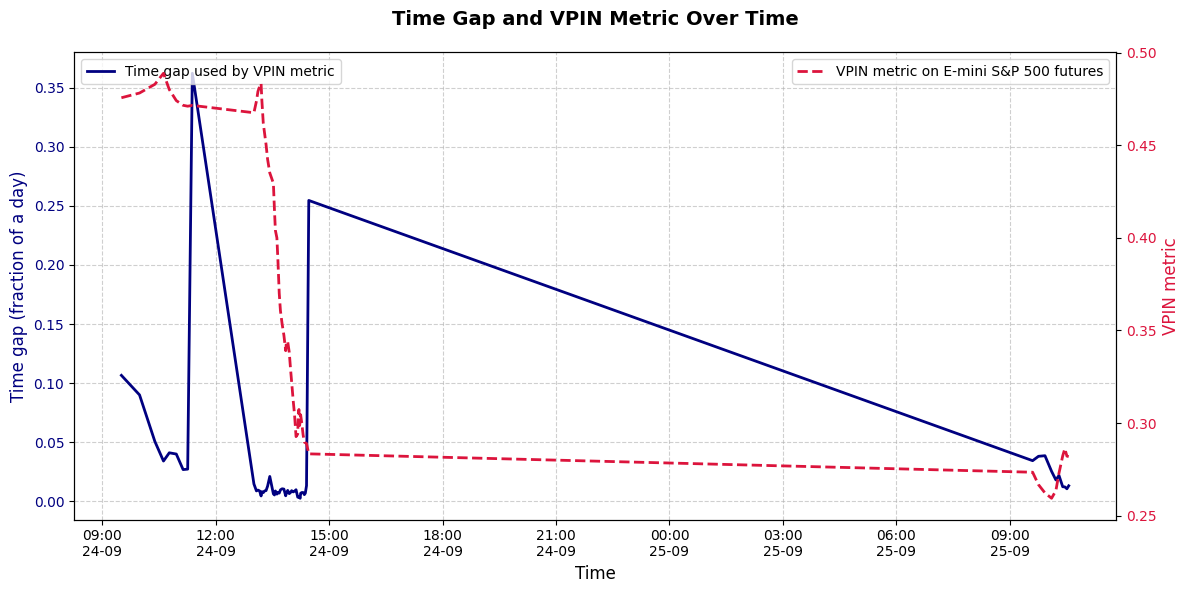

In [12]:
visualize_vpin_and_gap_time(vpin_df.head(60))

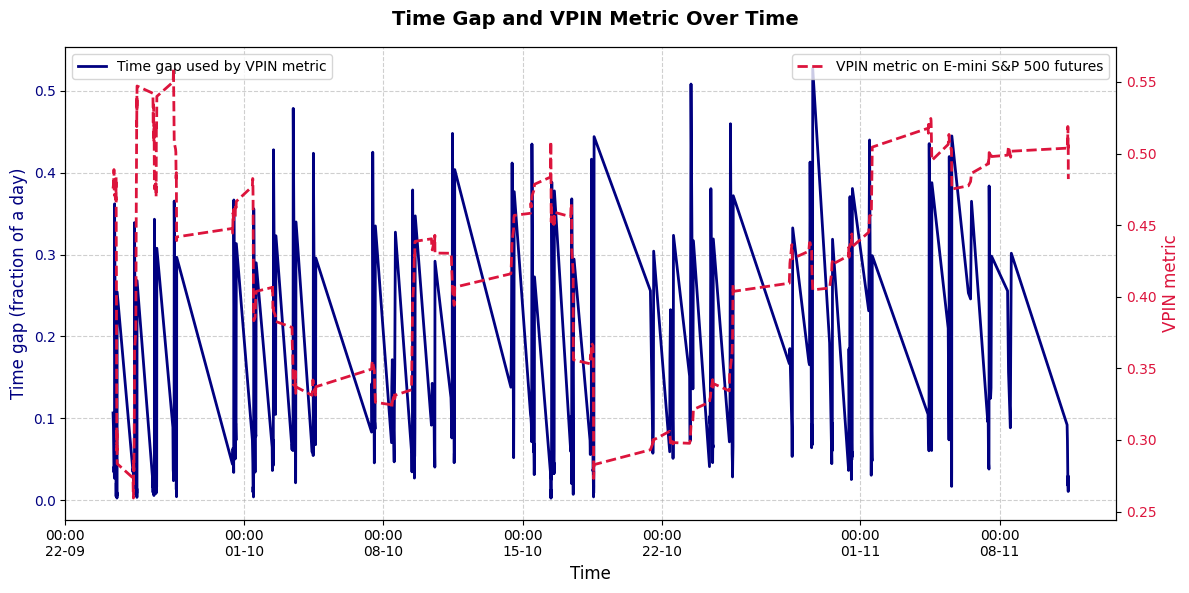

In [13]:
visualize_vpin_and_gap_time(vpin_df)

## PHẦN 3: CHIA DỮ LIỆU ĐỀU THEO THỜI GIAN VÀ ĐỀU THEO KHỐI LƯỢNG RỒI CHUẨN HOÁ

In [14]:

for key in data_orderbook.keys():
    # print(key)
    if key in ["VN30F4M", "VN30F2M", "VN30F3M", "VN30F1M"]:
        continue
    data = transform_buy_sell_volume(data_orderbook, key)
    V, STB = calculate_V(data, 50)
    if STB["Date"][0].minute <30:
        print(STB.head())

- Ta nhận thấy rằng không tồn tại bộ dữ liệu có data được thu thập từ 9h sáng đến 9h30 sáng, do đó khi phân đều 50 mốc dữ liệu trong ngày theo thời gian từ 9h00 sáng đến 3h00 chiều thì dữ liệu sẽ bị thiếu hụt cho khoảng từ 9h sáng đến 9h30, nên ta sẽ chọn mốc thời gian từ 9h30 sáng

In [15]:
price_df_scaled = transform_price_data(data_orderbook,
                                       key1="ACB")
price_df_scaled.head()

,time,bucket
0,0.642857,0.642857
1,0.642857,0.619048
2,0.619048,0.619048
3,0.619048,0.595238
4,0.619048,0.595238


In [16]:
price_df_scaled.value_counts()

time      bucket  
0.833333  0.833333    16
          0.809524    12
0.785714  0.833333    11
0.833333  0.785714    10
0.547619  0.547619     9
                      ..
0.785714  0.595238     1
0.642857  0.619048     1
0.761905  1.000000     1
0.642857  0.642857     1
0.976190  0.833333     1
Name: count, Length: 223, dtype: int64

In [17]:
price_df_scaled.describe()

,time,bucket
count,1949.000000,550.000000
mean,0.546774,0.584661
std,0.250099,0.255987
min,0.000000,0.000000
25%,0.309524,0.333333
50%,0.571429,0.642857
75%,0.785714,0.809524
max,1.000000,1.000000


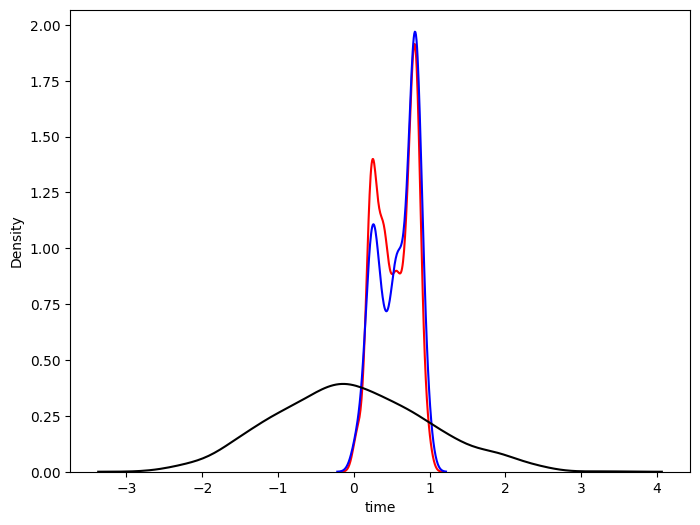

In [18]:
visualize_price(price_df_scaled)